<a href="https://colab.research.google.com/github/yun890503/Handwriting-RecognitionModel/blob/main/%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([60000, 28, 28])
torch.Size([60000])


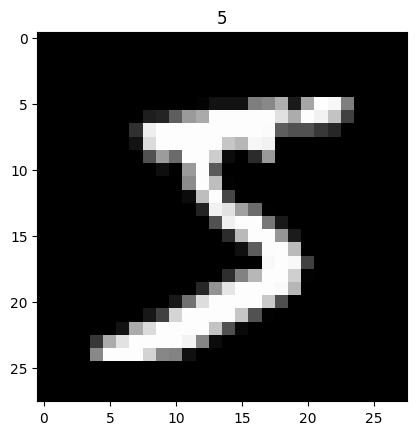

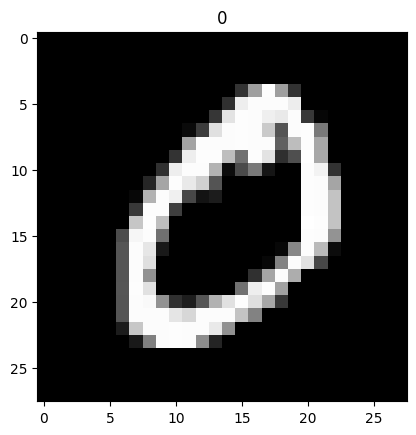

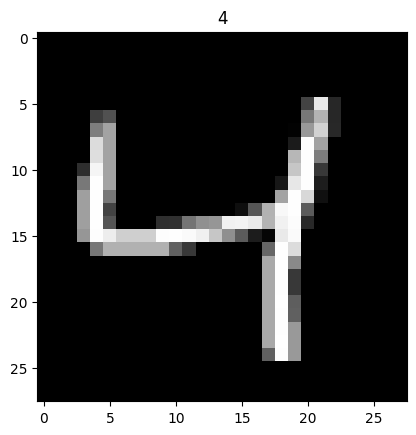

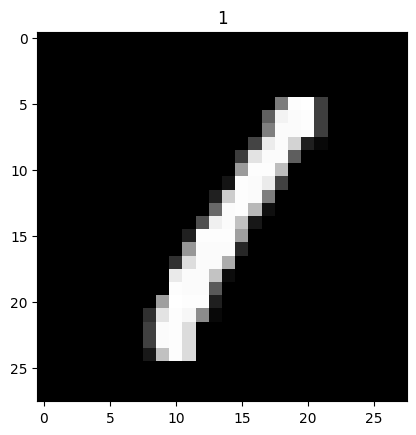

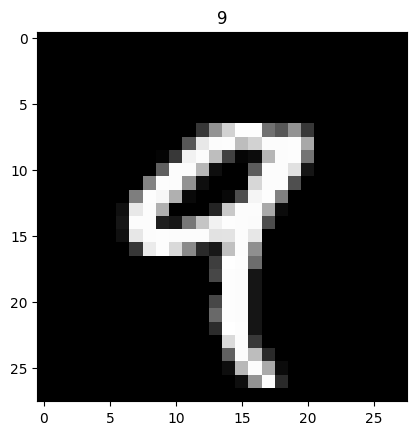

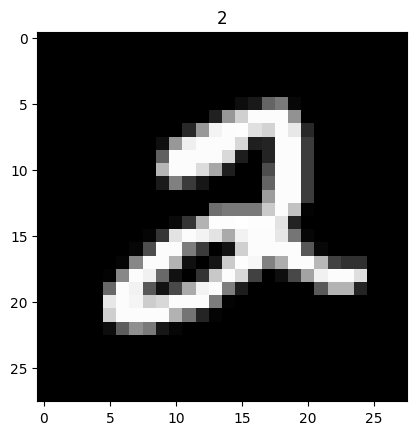

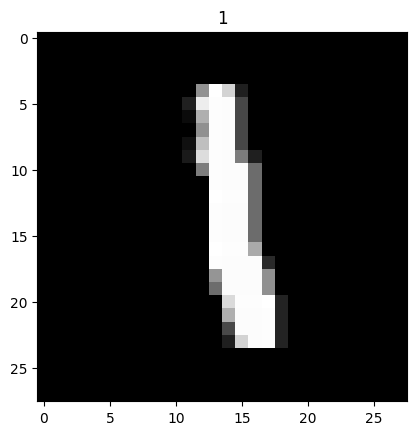

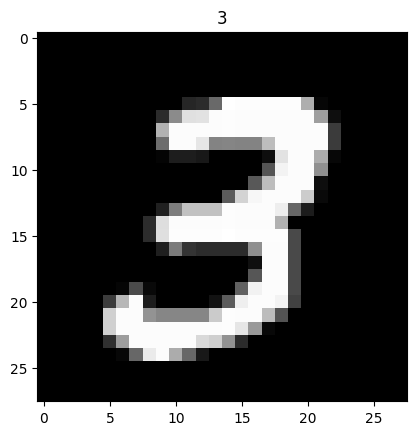

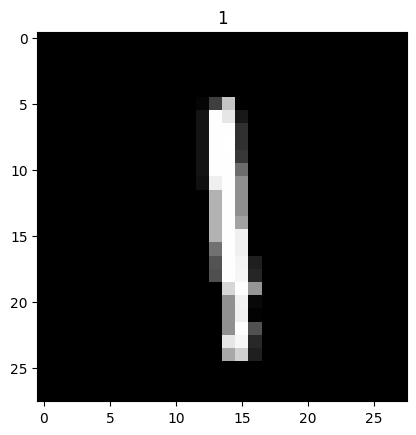

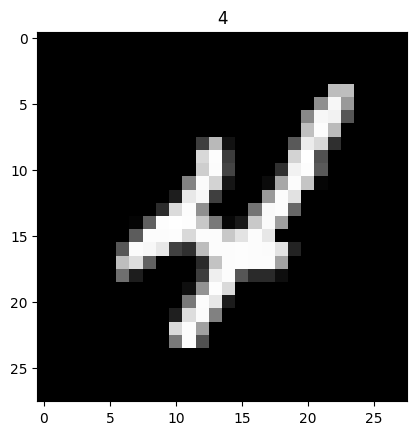

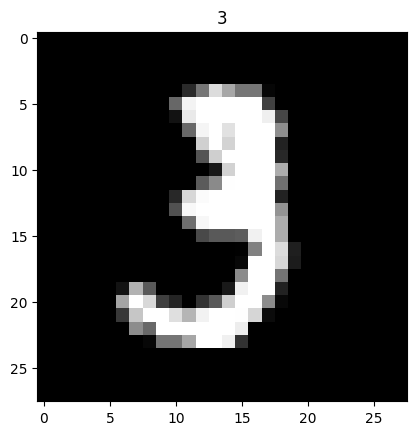

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2879 | test accuracy: 0.23
Epoch:  0 | train loss: 0.8537 | test accuracy: 0.78
Epoch:  0 | train loss: 0.4859 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3609 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1615 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1580 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2002 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1834 | test accuracy: 0.94
Epoch:  0 | train loss: 0.4101 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1899 | test accuracy: 0.9

In [31]:
import torch
from torch.utils import data as data_
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision
# 載入並查看MNIST照片
train_data = torchvision.datasets.MNIST(root = './mnist',train = True,transform = torchvision.transforms.ToTensor(),download = True)
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.ion()
for i in range(11):
  plt.imshow(train_data.train_data[i].numpy(), cmap = 'gray')
  plt.title('%i' % train_data.train_labels[i])
  plt.pause(0.5)
plt.show()

# 數據處理
train_loader = data_.DataLoader(dataset = train_data, batch_size = 30, shuffle = True,num_workers = 2)

test_data = torchvision.datasets.MNIST(root = './mnist/', train = False)
# 轉換數據類型和正規化:因為要使用灰階影像所以通道數(dim)為1,type(torch.FloatTensor)式pytorch中的數據類型，之後取前2000筆數據又因為要正規化所以/255
test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

# 建立卷積神經網路(CNN)
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

cnn = CNN()
print(cnn)
# optimization & loss function

optimization = torch.optim.Adam(cnn.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()


# 開始訓練(training)
for epoch in range(1):
  for step, (batch_x, batch_y) in enumerate(train_loader):
    bx = Variable(batch_x)
    by = Variable(batch_y)
    output = cnn(bx)[0]
    loss = loss_func(output, by)
    optimization.zero_grad()
    loss.backward()
    optimization.step()

    if step % 50 == 0:
        test_output, last_layer = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)


# testing
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')
